In [1]:
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error
import seaborn as sns
import numpy as np
from mpl_toolkits.mplot3d import Axes3D
import math

# Data Cleaning

In [2]:
# load data
df = pd.read_csv('mammographic_masses.data', na_values = "?")
# check shape before cleaning the data
print("old shape", df.shape)
# check total null values
df.isnull().sum()
# droping rows that contains null values
df_clean = df.dropna()
print("new shape", df_clean.shape)

old shape (961, 6)
new shape (830, 6)


In [3]:
# Cleaning out of bounds values for the Shape column so values are between 1&4
df_clean = df_clean.loc[df_clean[' Shape'] >= 1]
df_clean = df_clean.loc[df_clean[' Shape'] <= 4]
print(df_clean.shape)

(830, 6)


In [4]:
# Cleaning out of bounds values for the Margin column so values are between 1&5
df_clean = df_clean.loc[df_clean[' Margin'] >= 1]
df_clean = df_clean.loc[df_clean[' Margin'] <= 5]
print(df_clean.shape)

(830, 6)


In [5]:
# Cleaning out of bounds values for the Density column so values are between 1&4
df_clean = df_clean.loc[df_clean[' Density'] >= 1]
df_clean = df_clean.loc[df_clean[' Density'] <= 4]
print(df_clean.shape)

(830, 6)


In [6]:
# Cleaning out of bounds values for the BI-RADS assessment column so values are between 1&5
df_clean = df_clean.loc[df_clean['BI-RADS assessment'] >= 1]
df_clean = df_clean.loc[df_clean['BI-RADS assessment'] <= 5]
df_clean = df_clean.reset_index(drop=True)
print(df_clean.shape)

(816, 6)


In [7]:
def calculate(col, severity):
    count = {df_clean[col][i]: 0 for i in range(len(df_clean))}
    for i in range(len(df_clean)):
        if df_clean[' Severity'][i] == severity:
            count[df_clean[col][i]] += 1
    return count

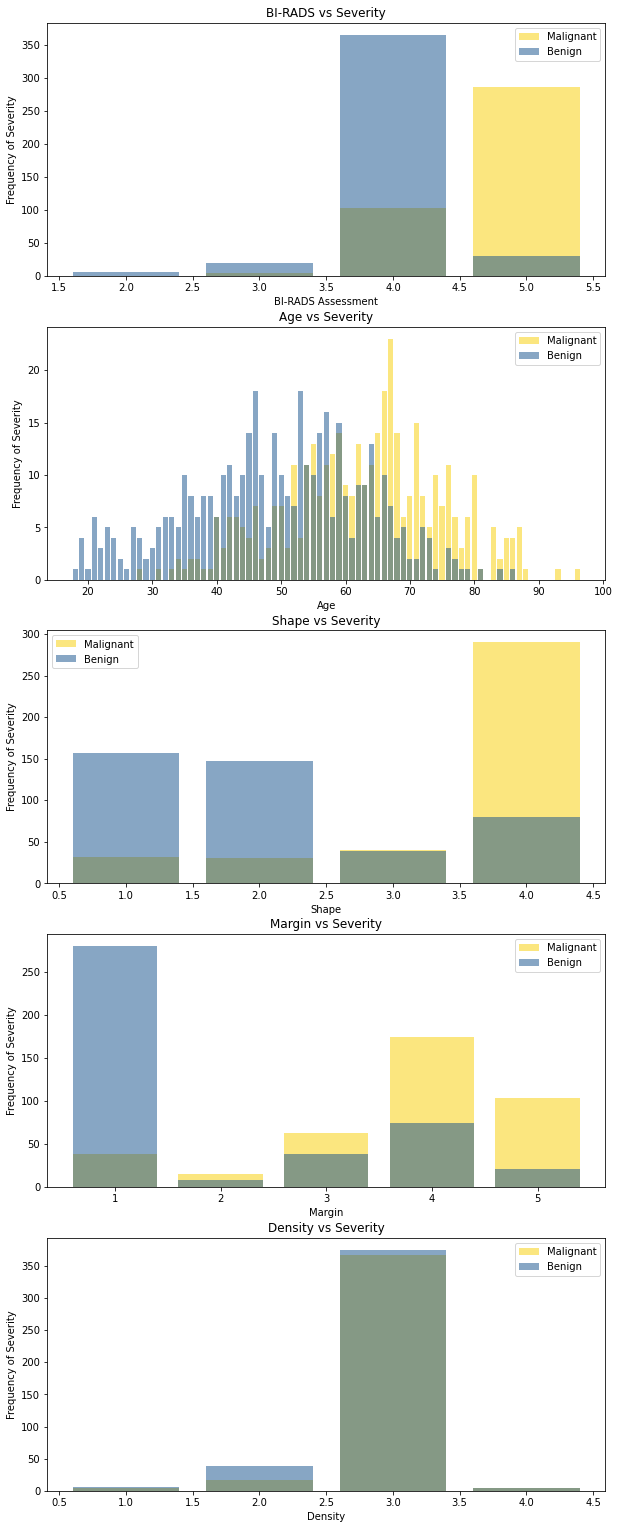

In [8]:
fig, sub = plt.subplots(5, 1, figsize=(10,27))
sub[0].title.set_text("BI-RADS vs Severity")
sub[0].set_ylabel("Frequency of Severity")
sub[0].set_xlabel("BI-RADS Assessment")
count = calculate('BI-RADS assessment', 1.0)
sub[0].bar(list(count.keys()), list(count.values()), align='center', label='Malignant', alpha=0.5, color='#F9CF00')
count = calculate('BI-RADS assessment', 0.0)
sub[0].bar(list(count.keys()), list(count.values()), align='center', label='Benign', alpha=0.5, color='#104E8B')
sub[0].legend()

sub[1].title.set_text("Age vs Severity")
sub[1].set_ylabel("Frequency of Severity")
sub[1].set_xlabel("Age")
count = calculate(' Age', 1.0)
sub[1].bar(list(count.keys()), list(count.values()), align='center', label='Malignant', alpha=0.5, color='#F9CF00')
count = calculate(' Age', 0.0)
sub[1].bar(list(count.keys()), list(count.values()), align='center', label='Benign', alpha=0.5, color='#104E8B')
sub[1].legend()

sub[2].title.set_text("Shape vs Severity")
sub[2].set_ylabel("Frequency of Severity")
sub[2].set_xlabel("Shape")
count = calculate(' Shape', 1.0)
sub[2].bar(list(count.keys()), list(count.values()), align='center', label='Malignant', alpha=0.5, color='#F9CF00')
count = calculate(' Shape', 0.0)
sub[2].bar(list(count.keys()), list(count.values()), align='center', label='Benign', alpha=0.5, color='#104E8B')
sub[2].legend()

sub[3].title.set_text("Margin vs Severity")
sub[3].set_ylabel("Frequency of Severity")
sub[3].set_xlabel("Margin")
count = calculate(' Margin', 1.0)
sub[3].bar(list(count.keys()), list(count.values()), align='center', label='Malignant', alpha=0.5, color='#F9CF00')
count = calculate(' Margin', 0.0)
sub[3].bar(list(count.keys()), list(count.values()), align='center', label='Benign', alpha=0.5, color='#104E8B')
sub[3].legend()

sub[4].title.set_text("Density vs Severity")
sub[4].set_ylabel("Frequency of Severity")
sub[4].set_xlabel("Density")
count = calculate(' Density', 1.0)
sub[4].bar(list(count.keys()), list(count.values()), align='center', label='Malignant', alpha=0.5, color='#F9CF00')
count = calculate(' Density', 0.0)
sub[4].bar(list(count.keys()), list(count.values()), align='center', label='Benign', alpha=0.5, color='#104E8B')
sub[4].legend()

In [9]:
#get the labels
labels = np.array(df_clean[' Severity'])
print(labels.shape)

(816,)


In [10]:
df_clean = df_clean.drop(' Severity',axis=1)
df_clean.head()

,BI-RADS assessment,Age,Shape,Margin,Density
0,5.0,67.0,3.0,5.0,3.0
1,5.0,58.0,4.0,5.0,3.0
2,4.0,28.0,1.0,1.0,3.0
3,5.0,57.0,1.0,5.0,3.0
4,5.0,76.0,1.0,4.0,3.0


# Split into train/test

In [11]:
stand = (df_clean - df_clean.mean())/df_clean.std()
cov = stand.cov()[' Severity'].to_frame()
plt.figure(figsize = (10,10))
print(cov)
#sns.heatmap(cov, annot="True", cmap="OrRd")
#plt.title('Covariance heat map')
#plt.show()

KeyError: ' Severity'

In [12]:
from sklearn.model_selection import train_test_split

In [13]:
X_train, X_test, y_train, y_test = train_test_split(df_clean, labels, test_size=0.2, random_state=42)

# K-Means

In [14]:
from sklearn.cluster import KMeans

## K-Means finding optimal clusters amount

In [15]:
from sklearn.preprocessing import MinMaxScaler
mms = MinMaxScaler()
mms.fit(df_clean)
data_transformed = mms.transform(df_clean)

In [16]:
SSEdist = []
n = range(1,15)
for k in n:
    km = KMeans(n_clusters=k)
    km = km.fit(data_transformed)
    SSEdist.append(km.inertia_)

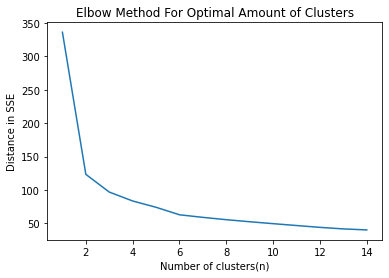

In [17]:
plt.plot(n, SSEdist)
plt.xlabel('Number of clusters(n)')
plt.ylabel('Distance in SSE')
plt.title('Elbow Method For Optimal Amount of Clusters')
plt.show()

## K-Means Implementation

In [18]:
kmeans = KMeans(n_clusters=2, random_state=10).fit(X_train)
kmeans.cluster_centers_

array([[ 4.10909091, 41.46181818,  2.34181818,  2.19272727,  2.88363636],
       [ 4.50928382, 65.64456233,  3.08488064,  3.24668435,  2.92838196]])

In [19]:
pred = kmeans.predict(X_test)

correct = 0
for i in range(len(pred)):
    if pred[i] == y_test[i]:
        correct = correct + 1

print("Accuracy is: {}".format(correct/len(pred)))   

Accuracy is: 0.7195121951219512


# KNN

In [20]:
from sklearn.neighbors import KNeighborsClassifier

## KNN optimal number of neighbors

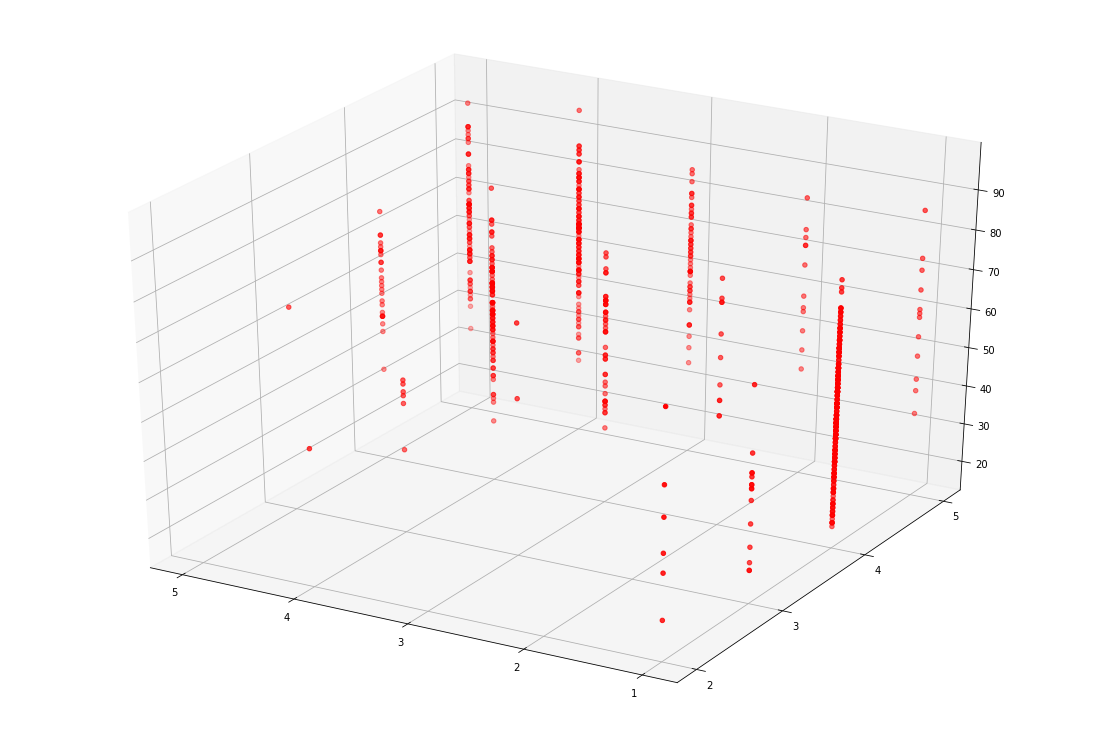

In [48]:
fig=plt.figure(figsize=(15,10))
ax=Axes3D(fig)
ax.scatter(df_clean[' Margin'],  df_clean['BI-RADS assessment'],df_clean[' Age'],color='red')
ax.set_xticks([5, 4, 3, 2, 1])
ax.invert_xaxis()
ax.invert_yaxis()
ax.set_yticks([1, 2, 3, 4, 5])
plt.show()

In [ ]:
from sklearn.model_selection import cross_val_score

In [ ]:
neighbors = list(range(1, 50))

# empty list that will hold cv scores
cv_scores = []

# perform 10-fold cross validation
for k in neighbors:
    knn = KNeighborsClassifier(n_neighbors=k)
    scores = cross_val_score(knn, X_train, y_train, cv=10, scoring='accuracy')
    cv_scores.append(scores.mean())

In [ ]:
# changing to misclassification error
mse = [1 - x for x in cv_scores]

# determining best k
optimal_k = neighbors[mse.index(min(mse))]
print("The optimal number of neighbors is {}".format(optimal_k))

# plot misclassification error vs k
plt.plot(neighbors, mse)
plt.xlabel("Number of Neighbors K")
plt.ylabel("Misclassification Error")
plt.show()

## KNN Implementation

In [ ]:
neigh = KNeighborsClassifier(n_neighbors= 7)
neigh.fit(X_train, y_train)

In [ ]:
correct = 0
total = X_test.shape[0]
counter = 0
for i in X_test.index:
    data = X_test.loc[i,:].values
    predicted = neigh.predict([data])
    if predicted[0] == y_test[counter]:
        correct += 1
    counter += 1
print("Accuracy is: {}".format(correct/total))

## Graphing KNN

In [ ]:
def graph_data(col1,col2,data,labels):
    '''
    This function graphs the data with labels. Assuming inputs are pandas dataframe and labels are 0 and 1.
    
    Variables:
        col1 - (int) column number of data to put on x-axis
        col2 - (int) column number of data to put on y-axis
        data - (pandas dataframe) the full pandas dataframe that col1 and col2 come from
        labels - (list-like) the associated labels for each row in data. 0 or 1
    '''
    assert isinstance(data,pd.core.frame.DataFrame)
    assert isinstance(col1,int)
    assert isinstance(col2,int)
    
    x0 = []
    x1 = []
    y0 = []
    y1 = []
    
    for i in range(len(labels)):
        if labels[i] == 0:
            x0.append(data.iloc[i,col1])
            y0.append(data.iloc[i,col2])
        else:
            x1.append(data.iloc[i,col1])
            y1.append(data.iloc[i,col2])
            
    plt.scatter(x0,y0,label=0)
    plt.scatter(x1,y1,label=1)
    plt.legend()
    plt.title("{} vs {}".format(data.columns[col1],data.columns[col2]))
    plt.xlabel(data.columns[col1])
    plt.ylabel(data.columns[col2])
    
    
    

In [ ]:
graph_data(1,2,X_train,y_train)